## Palmer Penguin Predictions

### Imports

In [144]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, regularizers, callbacks
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins

In [145]:
penguins = load_penguins()
penguins.dropna(inplace=True)
penguins.drop(columns='year', inplace=True)
X = penguins.drop(columns='sex')
y = penguins['sex']

### Preprocess data

In [146]:
le = LabelEncoder()
y = le.fit_transform(y)

In [147]:
preproc = make_column_transformer(
			(StandardScaler(), make_column_selector(dtype_exclude='object')),
			(OneHotEncoder(handle_unknown='ignore', sparse=False), 
				    make_column_selector(dtype_include='object'))
		    )

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4)

preproc.fit(X_train)
X_train_preproc = preproc.transform(X_train)
X_test_preproc = preproc.transform(X_test)
X_test_preproc.shape

(200, 10)

### Deep Learning Model

In [272]:
def init_mod(model, opt):
    
    model.add(layers.Dense(2, activation='relu', input_dim=10))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [284]:
def fit_mod(model, n_epochs=50):
    
    es = callbacks.EarlyStopping(patience=5)

    history = model.fit(X_train_preproc, y_train, 
                        batch_size=3, epochs=n_epochs,
                        validation_split=0.3,
                        callbacks=[es], verbose=0)
    
    return history

In [287]:
model = Sequential()

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model = init_mod(model, opt)

history = fit_mod(model, n_epochs=150)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 2)                 22        
                                                                 
 dense_145 (Dense)           (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


In [288]:
model.evaluate(X_test_preproc, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.9050


[0.2842400074005127, 0.9049999713897705]

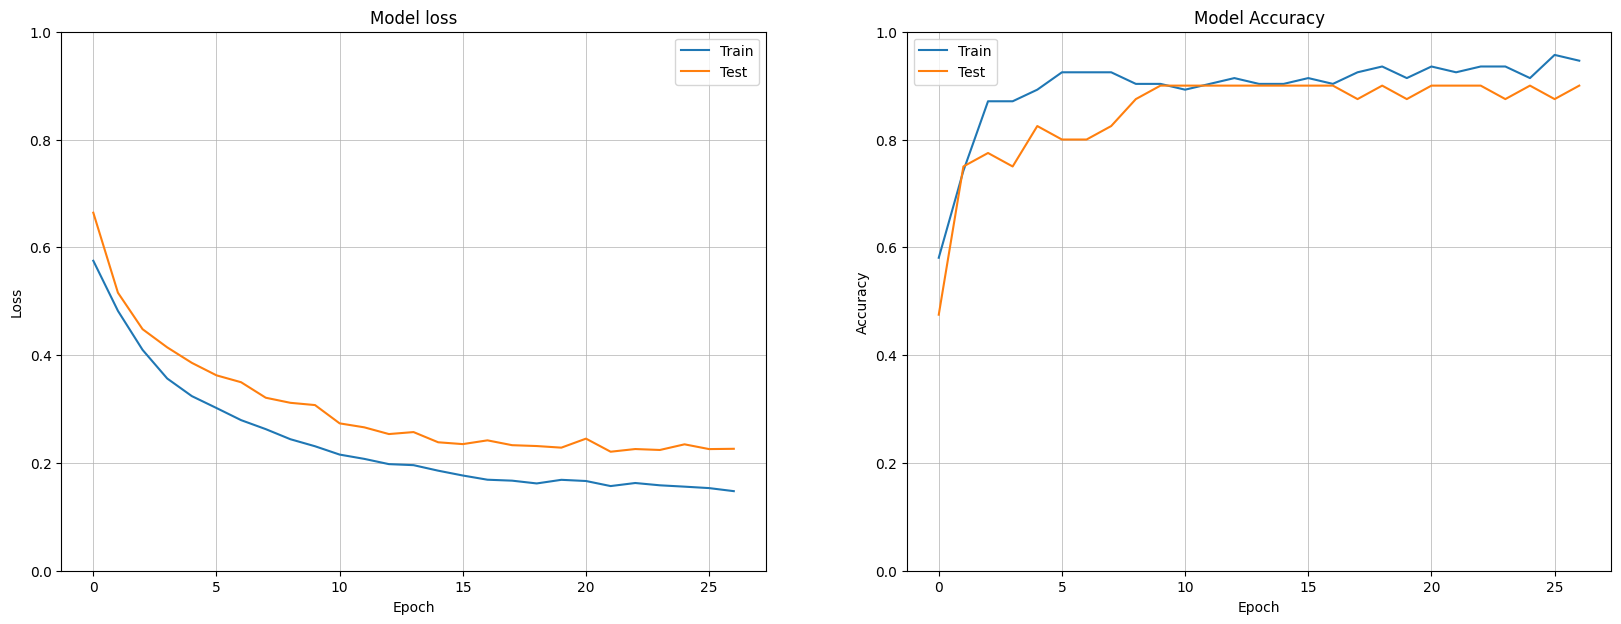

In [289]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,1))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

plot_loss_accuracy(history)
plt.show();